In [439]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [441]:
ls

 Volume in drive T is data_science
 Volume Serial Number is 109B-7FEF

 Directory of T:\prepleaf\project\ML_2

04/15/2022  03:42 PM    <DIR>          .
04/15/2022  03:42 PM    <DIR>          ..
04/15/2022  03:40 PM    <DIR>          .ipynb_checkpoints
04/12/2022  03:29 PM             8,015 archive (1).zip
04/12/2022  03:26 PM           304,132 Loan Status Prediction.docx
04/12/2022  03:27 PM            53,086 Loan Status Prediction.pdf
04/15/2022  03:41 PM           922,554 Loan_Status_Prediction.ipynb
04/12/2022  03:28 PM            38,013 train_u6lujuX_CVtuZ9i.csv
04/15/2022  03:42 PM               734 Untitled.ipynb
               6 File(s)      1,326,534 bytes
               3 Dir(s)   5,653,635,072 bytes free


In [442]:
import warnings
warnings.filterwarnings('ignore')

# Importing and Displaying the Dataset

In [443]:
data_original = pd.read_csv("train_u6lujuX_CVtuZ9i.csv")

In [444]:
df = data_original.copy() # Making a copy for future reference

In [445]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


as we do not need Loan_ID feature so we can remove this

In [446]:
df = df.iloc[:,1:]

In [447]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# About the Data

Loan_ID    : Unique Loan ID

Gender     : Male/Female

Married    : Applicant married(Y/N)

Dependents : Number of dependents

Education  : Applicant Education (Graduate/UnderGraduate)

Self_Employed: Self employed(Y/N)

ApplicantIncome : Applicant Income

CoapplicantIncome  : Coapplicant Income

LoanAmount  : Loan amount in months

Loan_Amount_Term : Term of loan in months

Credit_History  : credit history meets guidelines

Property_Area   : Urban/Semi Urban /Rural

Loan_Status     : Loan approved(Y/N)

In [448]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [449]:
df.shape

(614, 12)

# Counting for NaN or Null Values

In [450]:
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [451]:
df.isnull().sum().sort_values(ascending=False)[:10]

Credit_History       50
Self_Employed        32
LoanAmount           22
Dependents           15
Loan_Amount_Term     14
Gender               13
Married               3
Education             0
ApplicantIncome       0
CoapplicantIncome     0
dtype: int64

<AxesSubplot:>

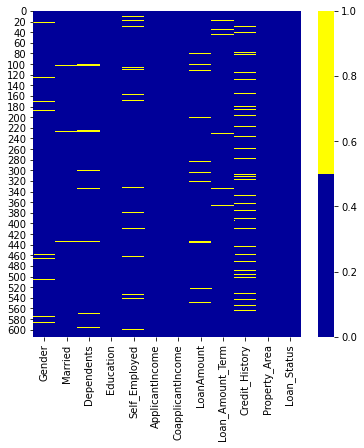

In [452]:
cols = df.columns
colours = ['#000099', '#ffff00']
sns.heatmap(df[cols].isnull(),
            cmap=sns.color_palette(colours))

Here, yellow color denotes the missing values

# Imputation of missing values and also converting the datatypes of each feature

Here, we will be imputating the missing values with mean, mode , median

If the feature is categorical then we will use mode

If it is continuous then we will be using mean/median.

In [453]:
df['Credit_History'].describe()

count    564.000000
mean       0.842199
std        0.364878
min        0.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: Credit_History, dtype: float64

In [454]:
df['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [455]:
df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace=True)

As credit_history is categorical , here we will replace the missing values with the mode

In [456]:
df['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [457]:
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)

In [458]:
df['Self_Employed'].value_counts()

No     532
Yes     82
Name: Self_Employed, dtype: int64

In [459]:
df['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [460]:
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)

In [461]:
df['Gender'].value_counts()

Male      502
Female    112
Name: Gender, dtype: int64

In [462]:
df['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [463]:
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace=True)

In [464]:
df['Dependents'].value_counts()

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [465]:
df['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [466]:
df['Married'].fillna(df['Married'].mode()[0],inplace=True)

In [467]:
df['Married'].value_counts()

Yes    401
No     213
Name: Married, dtype: int64

By some domain knowledge it's unfair to impute the loan amount with mean/median so dropping the records with missing values in LoanAmount and Loan_Amount_Term

In [468]:
df=df.dropna(subset=['LoanAmount', 'Loan_Amount_Term'])

In [469]:
data_original.shape

(614, 13)

In [470]:
df.shape

(578, 12)

In [471]:
614-578

36

In [472]:
22+14

36

So, now  all the missing values are imputed 

In [473]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Checking for duplicate records in the dataset

In [474]:
df[df.duplicated()]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status


In [475]:
# There are no duplicates

In [476]:
data = df.copy()

Here we kept a copy of df before preprocessing , as we need this data later on to visualize more properly

# Data Preprocessing

Using label encoder to level the categorical features into numeric values.

In [477]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [478]:
df.describe(include='all')

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,578,578,578,578,578,578.000000,578.000000,578.000000,578.000000,578.000000,578,578
unique,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3,2
top,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y
freq,472,377,335,457,501,NaN,NaN,NaN,NaN,NaN,225,403
mean,NaN,NaN,NaN,NaN,NaN,5435.138408,1640.482561,147.143599,342.145329,0.863322,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,6229.382997,2993.270767,86.342523,65.442101,0.343805,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,150.000000,0.000000,9.000000,12.000000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,2890.250000,0.000000,100.000000,360.000000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,3812.500000,1211.500000,128.000000,360.000000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,5795.000000,2281.000000,168.000000,360.000000,1.000000,NaN,NaN


In [479]:
df['Gender']=le.fit_transform(df['Gender'])

In [480]:
df['Married']=le.fit_transform(df['Married'])

In [481]:
df['Self_Employed']=le.fit_transform(df['Self_Employed'])

In [482]:
df['Education']=le.fit_transform(df['Education'])

In [483]:
df['Property_Area']=le.fit_transform(df['Property_Area'])

In [484]:
df['Loan_Status']=le.fit_transform(df['Loan_Status'])

In [485]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
5,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2,1


In [486]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


After label encoding 

In Gender     
Male:1
Female:0
            
In Married, Self_Employed      
Yes:1
No : 0
            
In Education      
Graduate: 0
Not Graduate : 1
            
In Property Area      
Rural: 0
Semiurban: 1
Urban: 2
                  
In Loan Status    
Yes: 1
No : 0

In [487]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
5,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2,1


# DataType Conversion

In [488]:
df.dtypes

Gender                 int32
Married                int32
Dependents            object
Education              int32
Self_Employed          int32
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int32
Loan_Status            int32
dtype: object

In [489]:
# Converting Dependents feature from object to int

In [490]:
df['Dependents'].value_counts()

0     335
2      98
1      97
3+     48
Name: Dependents, dtype: int64

In [491]:
# Here 3+ indicates that the no. of dependents on the applicant are more than 3, Let's consider them as 3

In [492]:
df[df['Dependents'] == '3+'].shape

(48, 12)

In [493]:
d = {'0':'0','1':'1','2':'2','3+':'3'}

In [494]:
df['Dependents'] = df['Dependents'].map(d)

In [495]:
df['Dependents'].value_counts()

0    335
2     98
1     97
3     48
Name: Dependents, dtype: int64

In [496]:
df['Dependents'] = df['Dependents'].astype('int32')

In [497]:
df['Credit_History'] = df['Credit_History'].astype('int32')

In [498]:
df[['CoapplicantIncome','LoanAmount','Loan_Amount_Term']] = df[['CoapplicantIncome','LoanAmount','Loan_Amount_Term']].astype('int64')

In [499]:
df.dtypes

Gender               int32
Married              int32
Dependents           int32
Education            int32
Self_Employed        int32
ApplicantIncome      int64
CoapplicantIncome    int64
LoanAmount           int64
Loan_Amount_Term     int64
Credit_History       int32
Property_Area        int32
Loan_Status          int32
dtype: object

Here we converted all the data types to integer,

As the dataset was having all the records in Int only , none of the data was in float so for convinence I changed the datatype of each to int only

# Outlier Detection

In [500]:
col = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term']

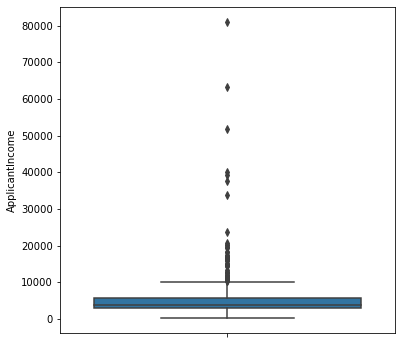

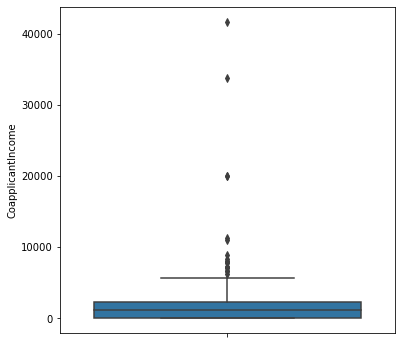

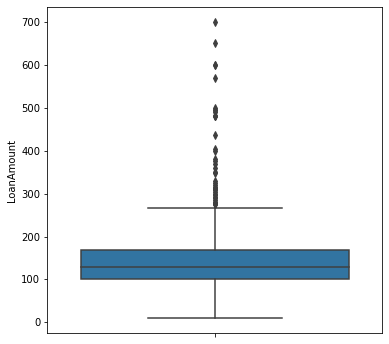

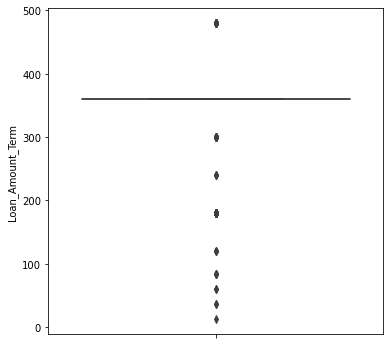

In [501]:
for c in col:
    plt.figure()
    sns.boxplot(y=c,data=df)

There are too many outliers in the dataset ,

But we should not remove them all as they might be genuine

# Data Visualization

([<matplotlib.patches.Wedge at 0x1a37141f670>,
 [Text(-0.8955077909013328, -0.638800278987897, 'Y'),
  Text(0.9769175900741812, 0.6968730316231602, 'N')],
 [Text(-0.48845879503709055, -0.34843651581158014, '69.7%'),
  Text(0.569868594209939, 0.40650926844684343, '30.3%')])

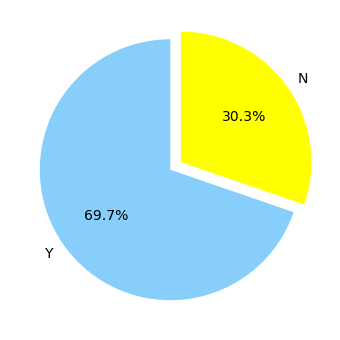

In [502]:
# Enlarging the pie chart
plt.rcParams['figure.figsize'] = 6,6

# Indexing labels. tolist() will convert the index to list for easy manipulation
labels = data['Loan_Status'].value_counts().index.tolist()

# Convert value counts to list
sizes = data['Loan_Status'].value_counts().tolist()

# As the name suggest, explode will determine how much each section is separated from each other 
explode = (0, 0.1)

# Determine colour of pie chart
colors = ['lightskyblue','yellow']

# Putting them together. Sizes with the count, explode with the magnitude of separation between pies, colors with the colors, 
# autopct enables you to display the percent value using Python string formatting. .1f% will round off to the tenth place.
# startangle will allow the percentage to rotate counter-clockwise. Lets say we have 4 portions: 10%, 30%, 20% and 40%. The pie will rotate from smallest to the biggest (counter clockwise). 10% -> 20% -> 30% -> 40%
# We have only 2 sections so anglestart does not matter
# textprops will adjust the size of text
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',startangle=90, textprops={'fontsize': 14})

Here the data is imbalanced

While building the model we will either be using oversampling or undersampling

Let's visualize all the categorical features

In [503]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


<AxesSubplot:xlabel='Gender', ylabel='count'>

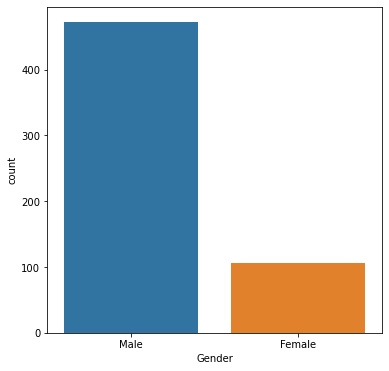

In [504]:
sns.countplot(x='Gender',data=data)

Around 80% who applied for Loan are male.

<AxesSubplot:xlabel='Married', ylabel='count'>

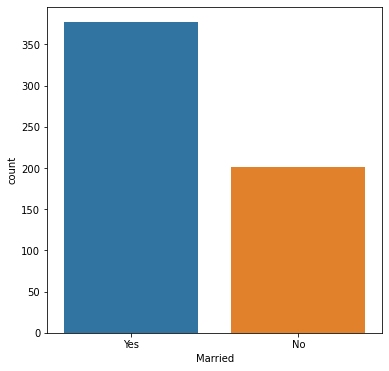

In [505]:
sns.countplot(x='Married',data=data)

Seems around 65% are married

<AxesSubplot:xlabel='Education', ylabel='count'>

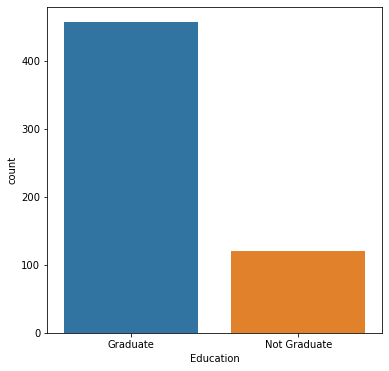

In [506]:
sns.countplot(x='Education',data=data)

Around 80% are graduated

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

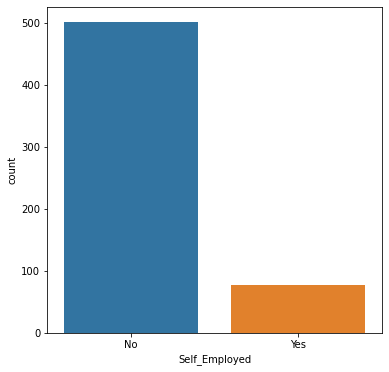

In [507]:
sns.countplot(x='Self_Employed',data=data)

majority are not self employed, either they work for any other organization 

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

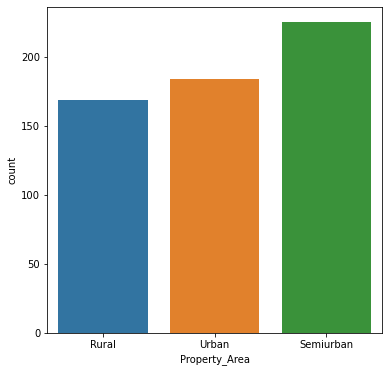

In [508]:
sns.countplot(x='Property_Area',data=data)

In [509]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


almost the applicants from rural,urban and semiurban area are equally distributted

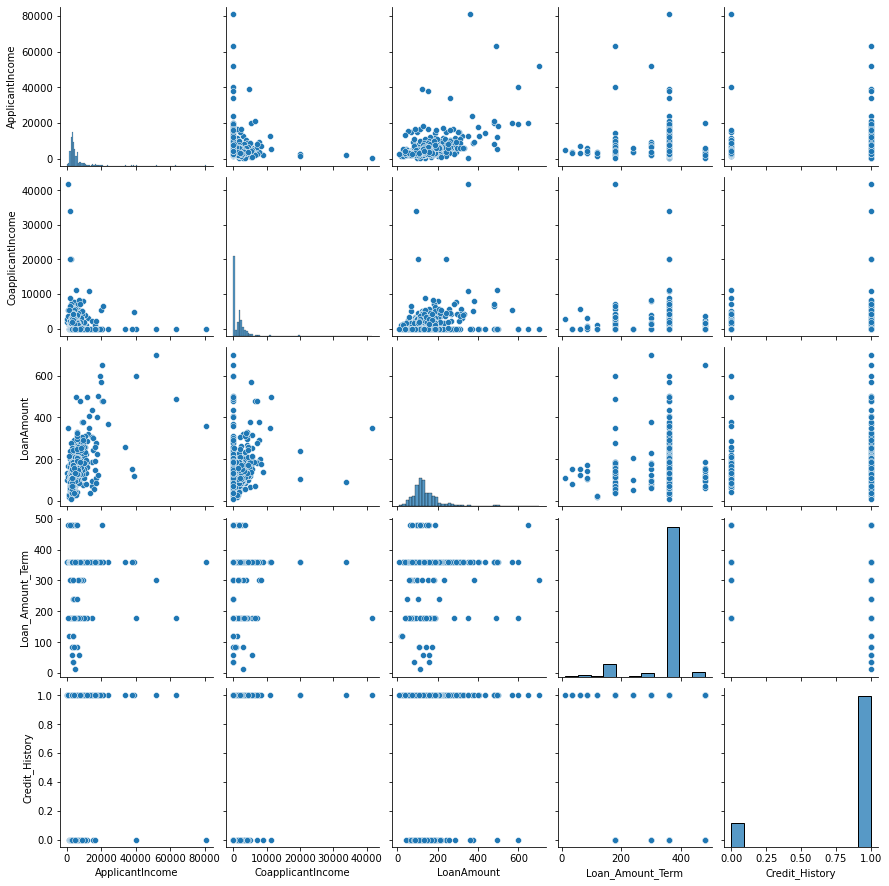

In [510]:
sns.pairplot(data)

In [511]:
data.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.113640,0.571298,-0.047348,-0.027859
CoapplicantIncome,-0.113640,1.000000,0.188855,-0.059797,0.004364
LoanAmount,0.571298,0.188855,1.000000,0.039447,-0.010839
Loan_Amount_Term,-0.047348,-0.059797,0.039447,1.000000,0.006893
Credit_History,-0.027859,0.004364,-0.010839,0.006893,1.000000


<AxesSubplot:>

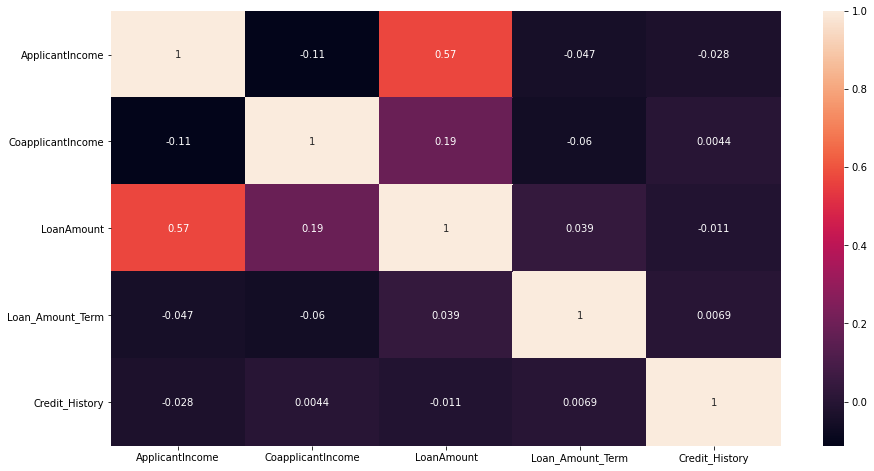

In [512]:
plt.figure(figsize=(15,8))
sns.heatmap(data.corr(),annot = True)

Here, we get to know that Loan Amount is positively correlated with ApplicantIncome

<AxesSubplot:xlabel='Loan_Status', ylabel='ApplicantIncome'>

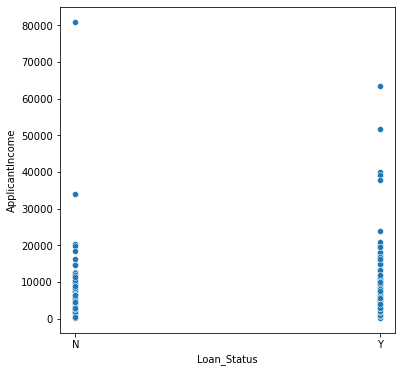

In [584]:
sns.scatterplot(data=data, x="Loan_Status", y="ApplicantIncome")

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

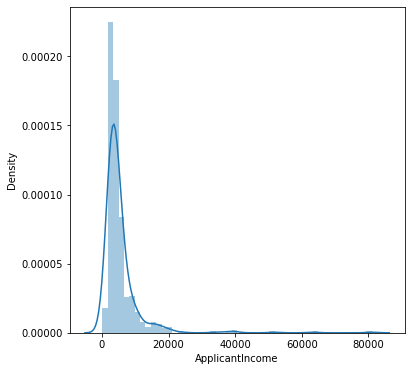

In [587]:
sns.distplot(df['ApplicantIncome'])

In [599]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_groups
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,High
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,Average
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,Average
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,High
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y,High


In [602]:
data[data['Loan_Status'] == 'Y']['ApplicantIncome'].describe()

count      403.000000
mean      5411.905707
std       5863.197828
min        210.000000
25%       2888.000000
50%       3813.000000
75%       5763.000000
max      63337.000000
Name: ApplicantIncome, dtype: float64

In [605]:
data['ApplicantIncome'].describe()

count      578.000000
mean      5435.138408
std       6229.382997
min        150.000000
25%       2890.250000
50%       3812.500000
75%       5795.000000
max      81000.000000
Name: ApplicantIncome, dtype: float64

<AxesSubplot:xlabel='Dependents', ylabel='count'>

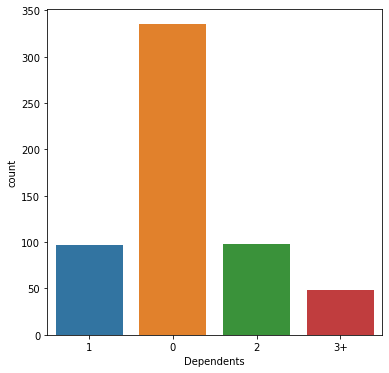

In [606]:
sns.countplot(x='Dependents', data=data)

# Inferences and Conclusion

1. Data is imbalanced

2. The number of male applicant are more than female

3. Applicant who applied for loan are mostly married

4. Also the Applications we are getting from the graduated people.

5. There are less no of people who are self employed

6. Applicant from urban , rural are almost equal

7. Loan amount is directly proportional to the Applicant's Income

8. Most of the applicants have less number of dependents

9. There is negative correlation between applicant and coapplicant income

# Splitting the dataset

In [514]:
from sklearn.model_selection import train_test_split

In [515]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,1,1,0,0,4583,1508,128,360,1,0,0
2,1,1,0,0,1,3000,0,66,360,1,2,1
3,1,1,0,1,0,2583,2358,120,360,1,2,1
4,1,0,0,0,0,6000,0,141,360,1,2,1
5,1,1,2,0,1,5417,4196,267,360,1,2,1


In [516]:
x = df.iloc[:,:-1].values

In [517]:
y = df.iloc[:,-1].values

In [518]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.3,random_state=50)

# Model Building

# Logistic Regression

In [519]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

In [520]:
classifier = LogisticRegression()

In [521]:
Logistic_model = classifier.fit(X_train,Y_train)

In [522]:
Logistic_model_pred = Logistic_model.predict(X_test)

In [523]:
confusion_matrix(Y_test,Logistic_model_pred)

array([[ 22,  26],
       [  6, 120]], dtype=int64)

In [524]:
tn,fp,fn,tp=confusion_matrix(Y_test,Logistic_model_pred).ravel()

In [525]:
print(tn,fp,fn,tp)

22 26 6 120


In [526]:
recall = tp/(tp+fn)
precision = tp/(tp+fp)

In [527]:
f_score = 2*recall*precision/(recall+precision)
f_score

0.8823529411764706

In [528]:
roc_auc_score(Y_test,Logistic_model_pred)

0.7053571428571428

In [529]:
LR_Acc=accuracy_score(Y_test,Logistic_model_pred)
LR_Acc

0.8160919540229885

Accuracy is around 82%

# Decision Tree ID3

In [530]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [531]:
dtree_ID3 = DecisionTreeClassifier(criterion='entropy',max_depth=4)

In [532]:
DT_ID3_model = dtree_ID3.fit(X_train,Y_train)

[Text(155.44285714285715, 293.54400000000004, 'X[9] <= 0.5\nentropy = 0.898\nsamples = 404\nvalue = [127, 277]'),
 Text(95.65714285714286, 228.312, 'X[10] <= 1.5\nentropy = 0.434\nsamples = 56\nvalue = [51, 5]'),
 Text(71.74285714285715, 163.08000000000004, 'X[5] <= 5392.5\nentropy = 0.562\nsamples = 38\nvalue = [33, 5]'),
 Text(47.82857142857143, 97.84800000000001, 'X[5] <= 4608.5\nentropy = 0.637\nsamples = 31\nvalue = [26, 5]'),
 Text(23.914285714285715, 32.61600000000004, 'entropy = 0.391\nsamples = 26\nvalue = [24, 2]'),
 Text(71.74285714285715, 32.61600000000004, 'entropy = 0.971\nsamples = 5\nvalue = [2, 3]'),
 Text(95.65714285714286, 97.84800000000001, 'entropy = 0.0\nsamples = 7\nvalue = [7, 0]'),
 Text(119.57142857142857, 163.08000000000004, 'entropy = 0.0\nsamples = 18\nvalue = [18, 0]'),
 Text(215.22857142857143, 228.312, 'X[7] <= 132.5\nentropy = 0.757\nsamples = 348\nvalue = [76, 272]'),
 Text(167.4, 163.08000000000004, 'X[6] <= 5031.5\nentropy = 0.64\nsamples = 191\nvalu

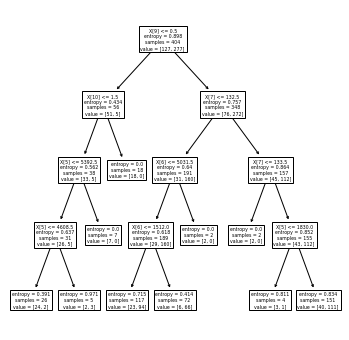

In [533]:
tree.plot_tree(DT_ID3_model)

In [534]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

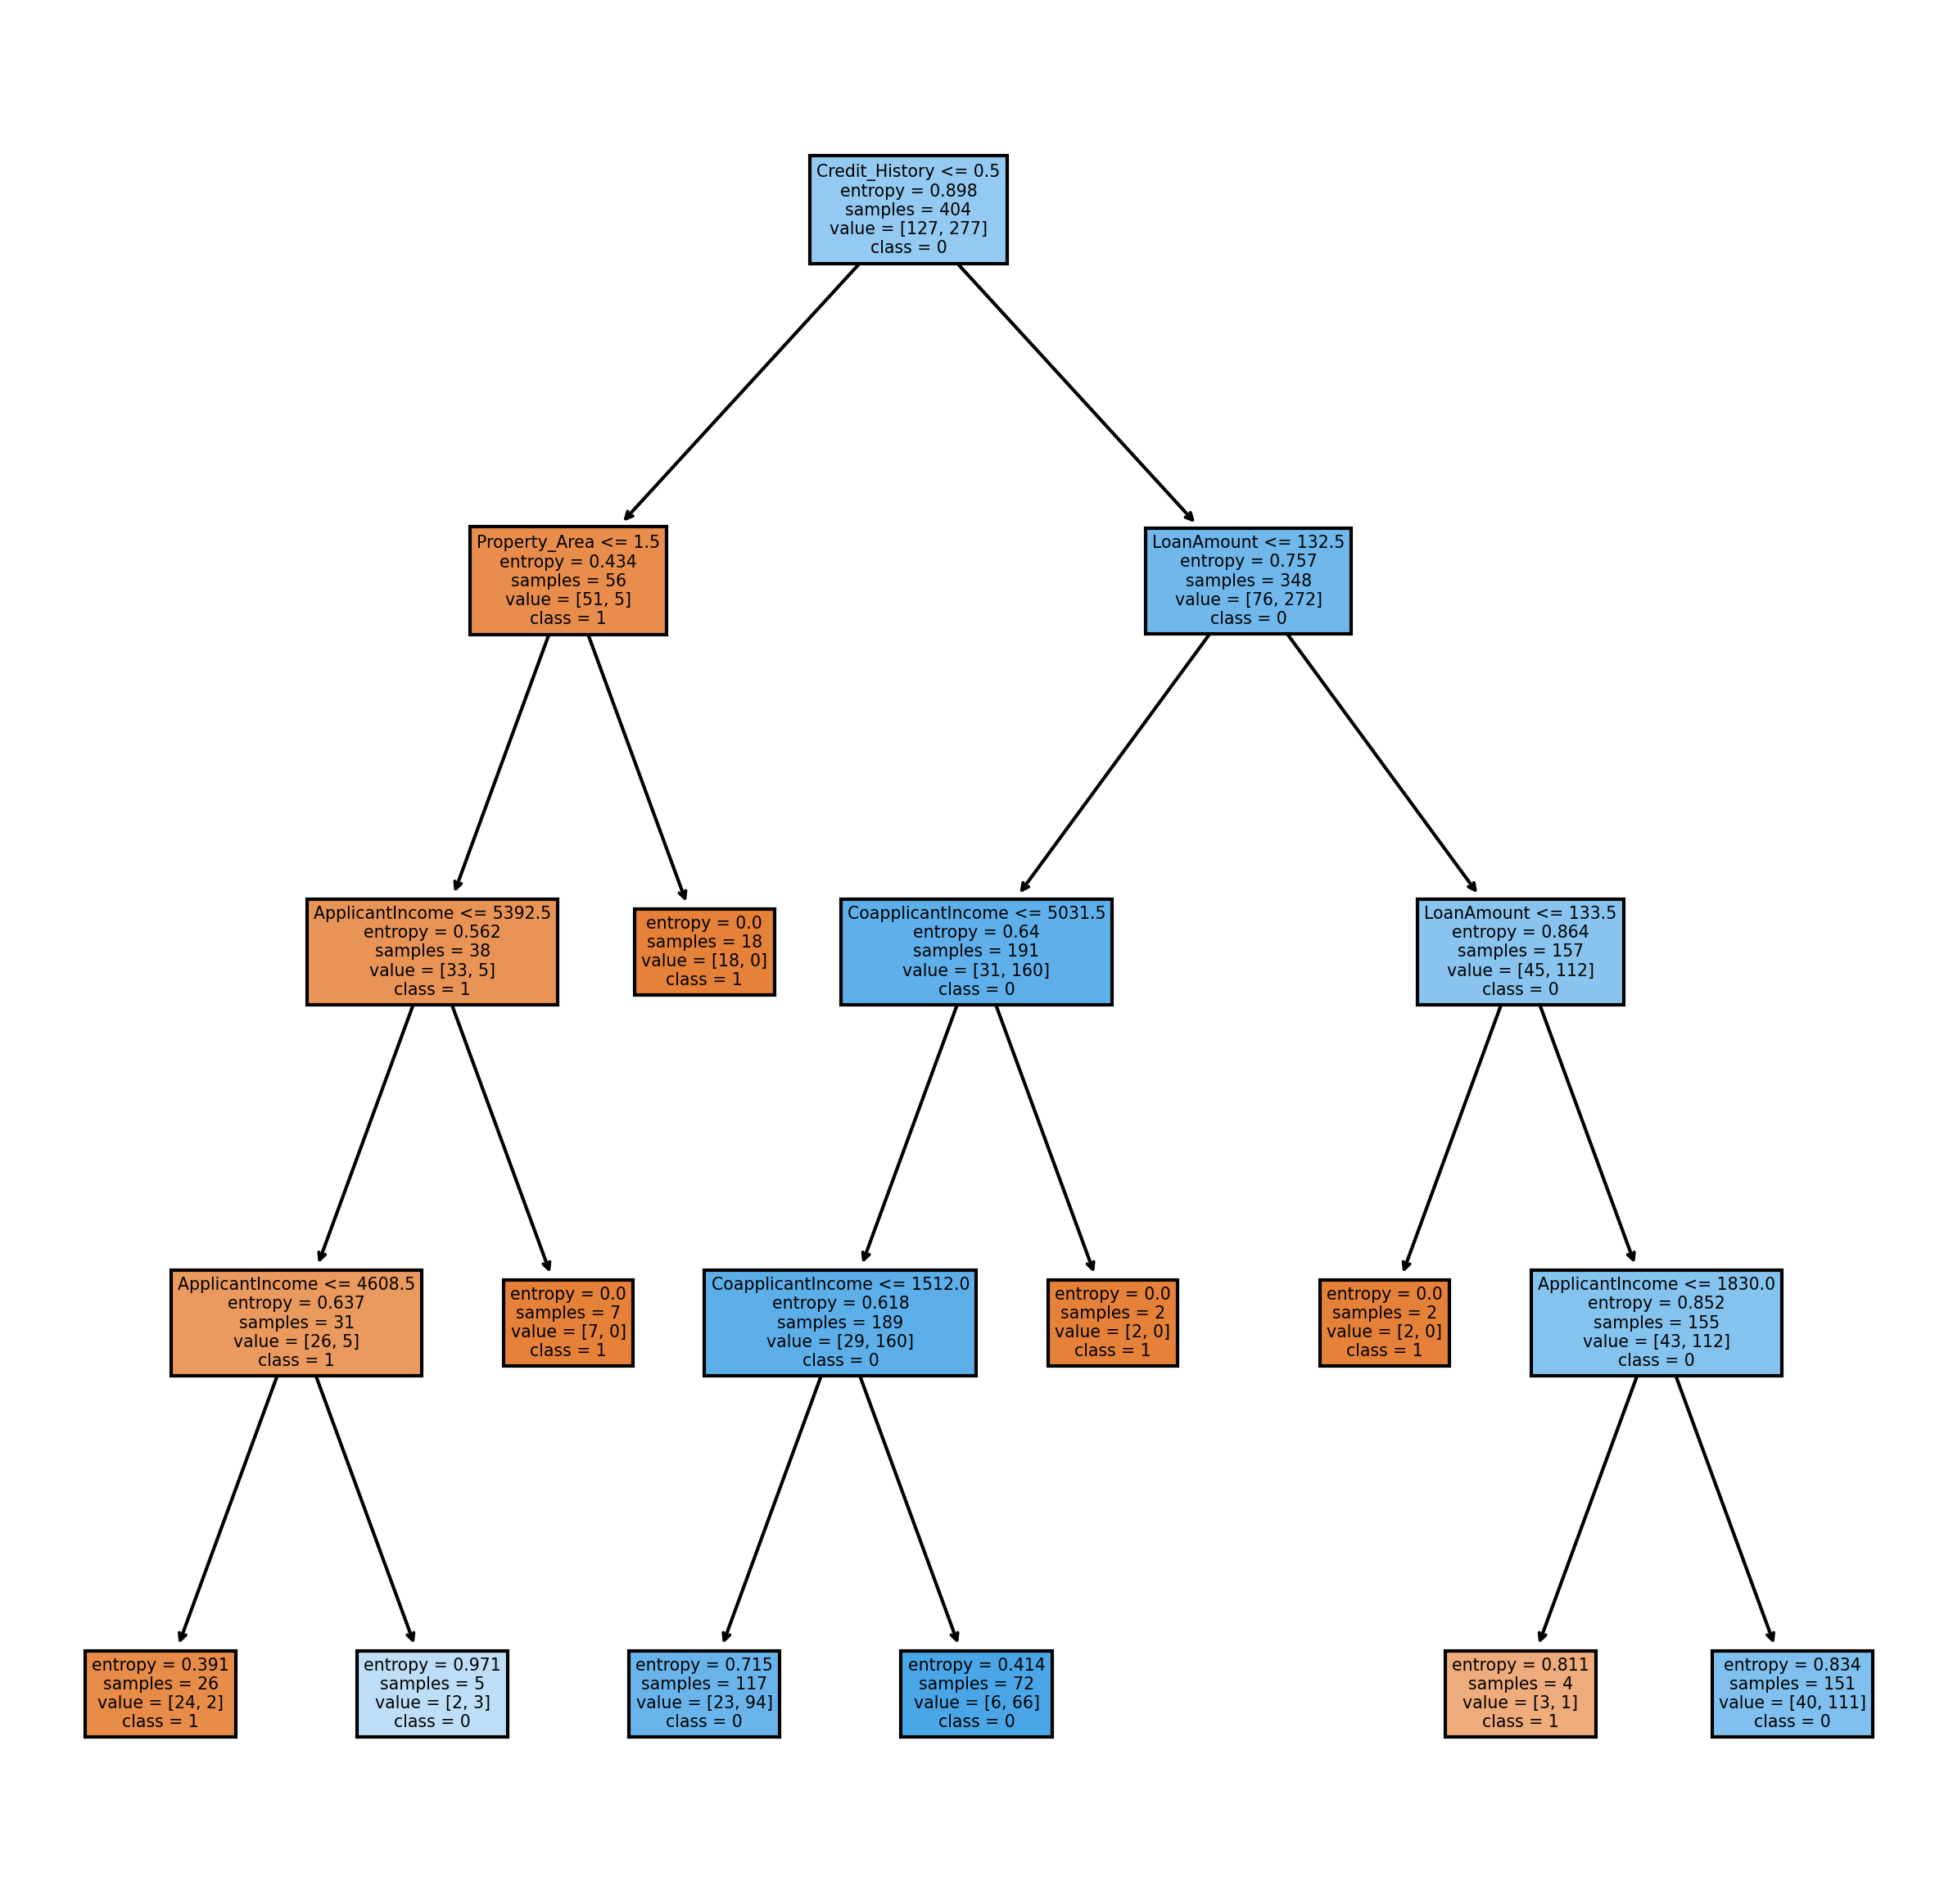

In [535]:
fn = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area']
cn = ['1','0']
fig, axes = plt.subplots(nrows = 1,ncols =1,figsize=(10,10),dpi=300)
tree.plot_tree(DT_ID3_model,feature_names=fn,class_names=cn,filled=True);

In [536]:
DT_ID3_model_pred = DT_ID3_model.predict(X_test)

In [537]:
DT_ID3_acc=accuracy_score(Y_test,DT_ID3_model_pred)
DT_ID3_acc

0.8218390804597702

In [538]:
confusion_matrix(Y_test,DT_ID3_model_pred)

array([[ 23,  25],
       [  6, 120]], dtype=int64)

In [539]:
tn,fp,fn,tp=confusion_matrix(Y_test,DT_ID3_model_pred).ravel()

In [540]:
recall = tp/(tp+fn)
precision = tp/(tp+fp)

In [541]:
f_score = 2*recall*precision/(recall+precision)
f_score

0.8856088560885608

accuracy is around 88%

Maximum accuracy we are getting is with depth of tree = 4

# Decision Tree CART

In [542]:
dtree_CART = DecisionTreeClassifier(criterion='gini',max_depth=5)

In [543]:
dtree_CART_model = dtree_CART.fit(X_train,Y_train)
dtree_CART_model_pred = dtree_CART_model.predict(X_test)

In [544]:
DT_CART_acc=accuracy_score(Y_test,dtree_CART_model_pred)
DT_CART_acc

0.8218390804597702

Accuracy is around 82%

In [545]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [546]:
importance = dtree_CART_model.feature_importances_
importance

array([0.        , 0.02216701, 0.00735408, 0.00770428, 0.        ,
       0.13650484, 0.05201364, 0.09069707, 0.00342822, 0.68013086,
       0.        ])

In [547]:
importance2 = DT_ID3_model.feature_importances_
importance2

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.08726703, 0.08315407, 0.08809193, 0.        , 0.71332617,
       0.0281608 ])

In [548]:
summ = 0
for c in importance:
    summ = summ+c
print(summ)

1.0


# Random Forest

In [549]:
from sklearn.ensemble import RandomForestClassifier

In [550]:
rfc = RandomForestClassifier()

In [551]:
RF_model = rfc.fit(X_train,Y_train)
RF_model_pred = RF_model.predict(X_test)

In [552]:
RF_acc=accuracy_score(Y_test,RF_model_pred)
RF_acc

0.7931034482758621

Accuracy is around 82%

# Stacking Ensemble

In [553]:
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

In [554]:
kfold = KFold(n_splits=10, random_state=7,shuffle=True)

In [555]:
# create the sub models
estimators = []
model1 = LogisticRegression()
estimators.append(('logistic', model1))
#model2 = RandomForestClassifier()
#estimators.append(('gini', model2))
model3 = DecisionTreeClassifier(criterion='entropy',max_depth=4)
estimators.append(('DecisionTreeID3', model3))
model4 = DecisionTreeClassifier(criterion='gini',max_depth=5)
estimators.append(('DecisionTreeCART', model4))

In [556]:
# create the ensemble model
ensemble = VotingClassifier(estimators)
results = cross_val_score(ensemble, x, y, cv=kfold)
EM_acc = results.mean()
print(EM_acc)

0.7960375075620085


Accuracy is around 81%

# KNN

In [557]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

In [558]:
num_folds = 10
kfold = KFold(n_splits=10)

In [559]:
KNN_model = KNeighborsClassifier(n_neighbors=15)
results2 = cross_val_score(KNN_model,x,y,cv=kfold)

In [560]:
KNN_acc = results2.mean()
print(KNN_acc)

0.6747731397459165


Grid Search for Tuning the no. of neighbors

In [561]:
from sklearn.model_selection import GridSearchCV

In [562]:
n_neighbors = np.array(range(1,70))
param_grid = dict(n_neighbors = n_neighbors)

In [563]:
model = KNeighborsClassifier()
grid = GridSearchCV(estimator= model,param_grid=param_grid)
grid.fit(x,y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69])})

In [564]:
print(grid.best_score_)
print(grid.best_params_)

0.7024137931034482
{'n_neighbors': 28}


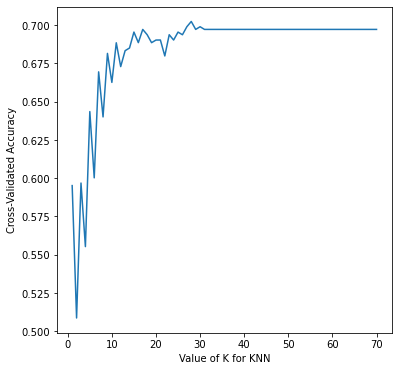

In [565]:
k_range = range(1,71)
k_scores = []
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x, y, cv=5)
    k_scores.append(scores.mean())
# plot to see clearly
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

The best accuracy we are getting with KNN model is 70%

# SVM

In [566]:
from sklearn import svm
from sklearn.svm import SVC

In [567]:
SVM_model = SVC().fit(X_train,Y_train)

In [568]:
SVM_model_pred = SVM_model.predict(X_test)

In [569]:
SVM_acc=accuracy_score(Y_test,SVM_model_pred)
SVM_acc

0.7183908045977011

# Accuracy Comparision

In [570]:
compare = pd.DataFrame({'Model': ['Logistic Regression', 'Decision Tree ID3', 'Decision Tree CART', 'Random Forest','Stacking Ensemble','KNN','SVM'], 
                        'Accuracy': [LR_Acc*100, DT_ID3_acc*100, DT_CART_acc*100, 
                                     RF_acc*100, EM_acc*100, KNN_acc*100, 
                                     SVM_acc*100]})
compare.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy
1,Decision Tree ID3,82.183908
2,Decision Tree CART,82.183908
0,Logistic Regression,81.609195
4,Stacking Ensemble,79.603751
3,Random Forest,79.310345
6,SVM,71.839080
5,KNN,67.477314


# Removing the Outliers

In [571]:
df2 = df.copy()

In [572]:
df2.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [573]:
col = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term']

In [574]:
for c in col:
  percentile25=df2[c].quantile(0.25)
  percentile75=df2[c].quantile(0.75)
  iqr=percentile75-percentile25
  upper_limit=percentile75+(1.5*iqr)
  lower_limit=percentile25-(1.5*iqr)
  df2=df2[df2[c]<upper_limit]
  df2=df2[df2[c]>lower_limit]

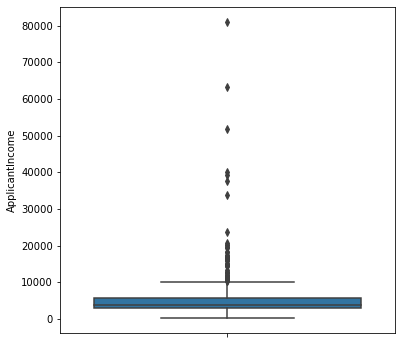

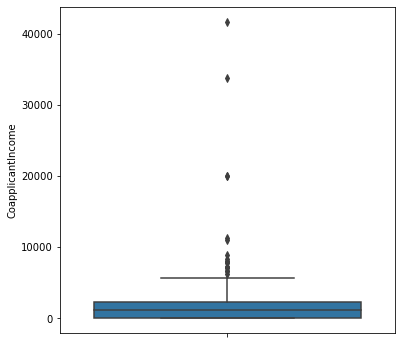

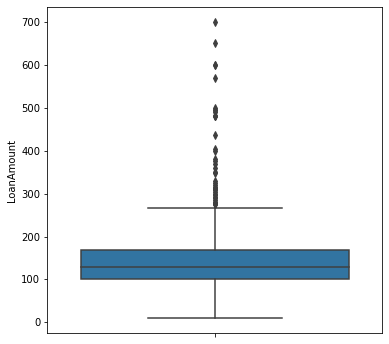

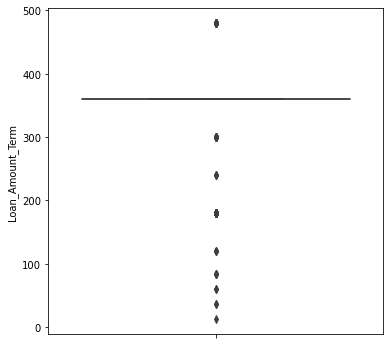

In [575]:
for c in col:
  plt.figure()
  sns.boxplot(y=c,data=df)

In [576]:

df2.shape

(0, 12)

removing the outliers is not possible , as each record in the dataset have atleast one outlier

# Model Deployment

In [577]:
import pickle

In [578]:
file = 'model.pkl'
pickle.dump(DT_ID3_model, open('model.pkl','wb'))

In [579]:
# Testing the model

In [582]:
model = open('model.pkl','rb')
model_test = pickle.load(model)

model_test.score(X_test, Y_test)


0.8218390804597702